<img src="" width="240" height="360" />

# Anomaly Detection

## Table of Content

1. [Introduction to Anomaly Detection](#section1)<br>
    - 1.1 [What are anomalies?](#section101)<br>
    - 1.2 [Anomaly Detection Technique](#section102)<br>
        - 1.2.1 [Simple Statistical Methods](#section103)<br>
    - 1.3 [Machine Learning Based Approach](#section104)<br>
        - 1.3.1 [Clustering Based Anomaly detection](#section105)<br>
        - 1.3.2 [Support Vector Machine Based Anomaly Detection](#section106)<br>
2. [Use Case : Ambient_temperature_system_failure](#section2)<br>
3. [Data Preprocessing](#section3)<br>
4. [Feature Engineering](#section4)<br>
5. [Models](#section5)<br>
    - 5.1 [Cluster Only](#section501)<br>
    - 5.2 [Categories + Gaussian](#section502)<br>
    - 5.3 [Isolation Forest](#section503)<br>
    - 5.4 [One Class SVM](#section504)<br>
6. [Conclusion](#section6)<br>

<a id=section1></a>
## Introduction

Anomaly detection is a technique used to __identify unusual patterns__ that do not conform to expected behavior, called __outliers__. 
- It has many applications in business, from 
    - __Intrusion detection__ (identifying strange patterns in network traffic that could signal a hack).
    - system __health monitoring__ (spotting a malignant tumor in an MRI scan).
    - __Fraud detection__ in credit card transactions.
    - __Fault detection__ in operating environments.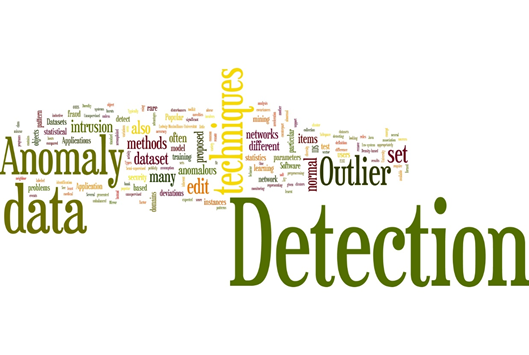

<a id=section101></a>
### What are anomalies?

Anomalies can be broadly categorized as:<br>
1. Point anomalies
2. Contextual anmoalies
3. Collective anomalies

#### 1. Point Anamoly  
A single instance of data is anomalous if it's too far off from the rest. <br><br>__Business use case__: Detecting credit card fraud based on "amount spent."<br>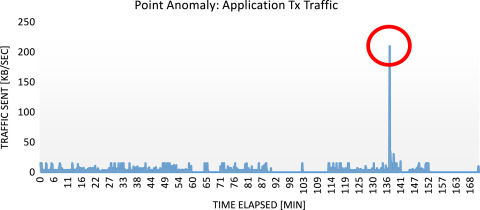

2. The abnormality is context specific. This type of anomaly is common in time-series data.<br> 
Business use case: Spending $100 on food every day during the holiday season is normal, but may be odd otherwise.<br>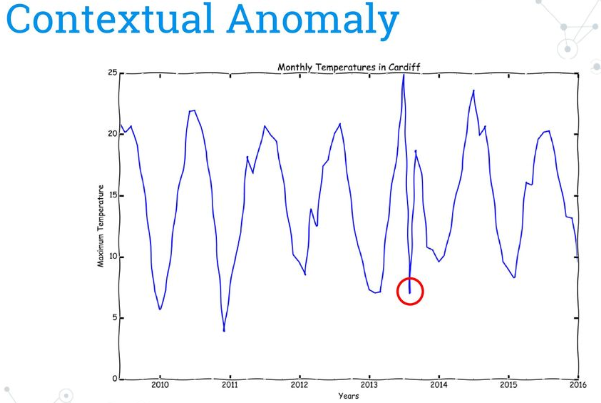

3. A set of data instances collectively helps in detecting anomalies.<br> 
Business use case: Someone is trying to copy data from a remote machine to a local host unexpectedly, an anomaly that would be flagged as a potential cyber attack. <br>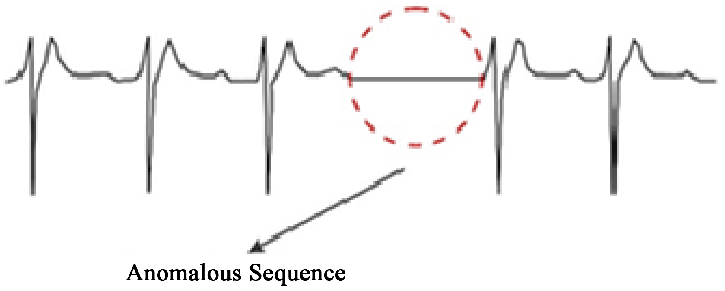

Anomaly detection is similar to — but not entirely the same as — __noise removal__ and __novelty detection__. <br><br>
`Novelty detection is concerned with identifying an unobserved pattern in new observations not included in training data — like a sudden interest in a new channel on YouTube during Christmas, for instance.`<br><br> 
`Noise removal (NR) is the process of immunizing analysis from the occurrence of unwanted observations; in other words, removing noise from an otherwise meaningful signal.`

<a id=section102></a>
## Anomaly Detection Techniques

<a id=section103></a>
### Simple statistical methods

The simplest approach to identifying irregularities in data is to flag the data points that deviate from common statistical properties of a distribution, including mean, median, mode, and quantiles.<br>
- Let's say the definition of an anomalous data point is one that deviates by a certain standard deviation from the mean.
- Traversing mean over time-series data isn't exactly trivial, as it's not static. 
- You would need a rolling window to compute the average across the data points. 
- Technically, this is called a rolling average or a moving average, and it's intended to smooth short-term fluctuations and highlight long-term ones. 
- Mathematically, an n-period simple moving average can also be defined as a "low pass filter."

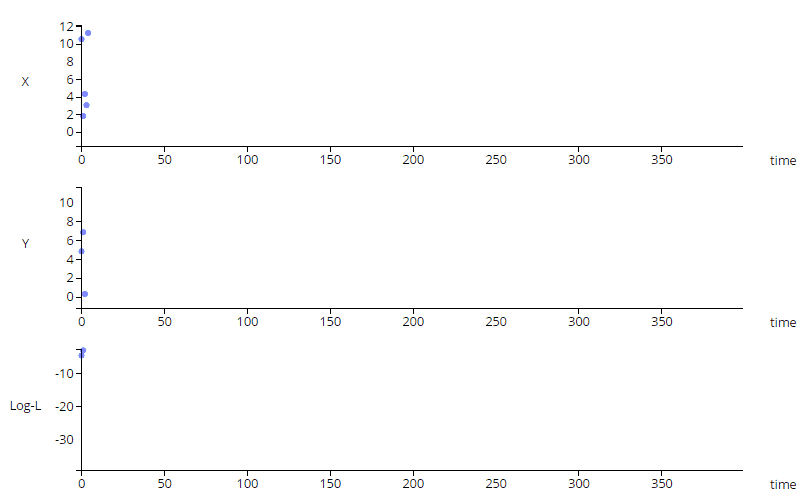

<a id=section104></a>
### Machine Learning Based Approach

#### Density based Anomaly Detection

Density-based anomaly detection is based on the __k-nearest neighbors__ algorithm.

__Assumption__: Normal data points occur around a __dense neighborhood and abnormalities are far away__. 

The nearest set of data points are evaluated using a score, which could be Eucledian distance or a similar measure dependent on the type of the data (categorical or numerical). They could be broadly classified into two algorithms:<br>

1. __K-nearest neighbor__: k-NN is a simple, non-parametric lazy learning technique used to classify data based on similarities in distance metrics such as Eucledian, Manhattan, Minkowski, or Hamming distance.
2. __Relative density of data__: This is better known as __local outlier factor (LOF)__. This concept is based on a distance metric called reachability distance.<br>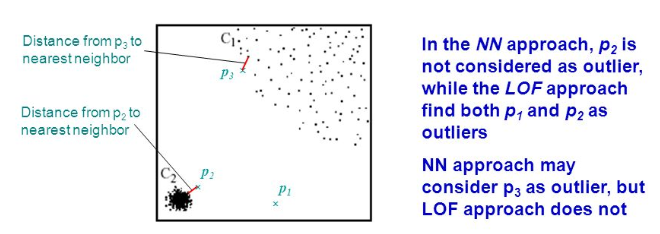

<a id=section105></a>
#### Clustering Based Anomaly Detection
__Clustering__ is one of the most popular concepts in the domain of __unsupervised learning__.

__Assumption__: Data points that are similar tend to belong to similar groups or clusters, as determined by their distance from local centroids.

__K-means__ is a widely used clustering algorithm. It creates 'k' similar clusters of data points. Data instances that __fall outside__ of these groups could potentially be marked as anomalies.<br>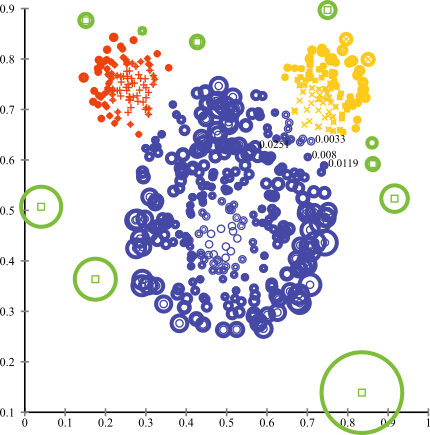

<a id=section106></a>
#### Support Vector Machine Based Anomaly Detection
A support vector machine is another effective technique for detecting anomalies. 
- A SVM is typically associated with __supervised learning__, but there are _extensions (OneClassCVM, for instance) that can be used to identify anomalies as an unsupervised problems (in which training data are not labeled)_. 
- The algorithm learns a soft boundary in order to cluster the normal data instances using the training set, and then, using the testing instance, it tunes itself to identify the abnormalities that fall outside the learned region.<br>

Depending on the use case, the output of an anomaly detector could be __numeric scalar values for filtering on domain-specific thresholds or textual labels (such as binary/multi labels)__.<br>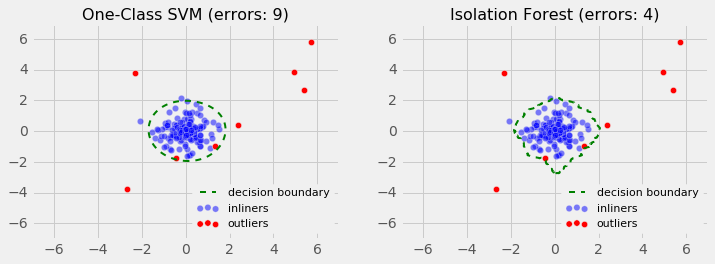

<a id=section2></a>
### Use Case : Ambient Temperature System Failure
- Data for Ambient Temperature in Office setting

# Algorithm implemented :
- Cluster based anomaly detection (K-mean)
- Repartition of data into categories then Gaussian/Elliptic Enveloppe on each categories separately
- Isolation Forest
- One class SVM

### Import libraries

In [2]:
import pandas as pd
import numpy as np

import matplotlib
import seaborn
import matplotlib.dates as md
from matplotlib import pyplot as plt

from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM

In [3]:
# some function for later

# return Series of distance between each point and his distance with the closest centroid
def getDistanceByPoint(data, model):
    distance = pd.Series()
    for i in range(0,len(data)):
        Xa = np.array(data.loc[i])
        Xb = model.cluster_centers_[model.labels_[i]-1]
        distance.set_value(i, np.linalg.norm(Xa-Xb))
    return distance


<a id=section3></a>
### Data Pre-processing

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-4/master/CaseStudy/ambient_temperature_system_failure.csv")
df.head()

,timestamp,value
0,2013-07-04 00:00:00,69.880835
1,2013-07-04 01:00:00,71.220227
2,2013-07-04 02:00:00,70.877805
3,2013-07-04 03:00:00,68.959400
4,2013-07-04 04:00:00,69.283551


#### Understand data

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 2 columns):
timestamp    7267 non-null object
value        7267 non-null float64
dtypes: float64(1), object(1)
memory usage: 113.6+ KB
None


#### Check the timestamp format and frequence 

In [5]:

print(df['timestamp'].head(10))

0    2013-07-04 00:00:00
1    2013-07-04 01:00:00
2    2013-07-04 02:00:00
3    2013-07-04 03:00:00
4    2013-07-04 04:00:00
5    2013-07-04 05:00:00
6    2013-07-04 06:00:00
7    2013-07-04 07:00:00
8    2013-07-04 08:00:00
9    2013-07-04 09:00:00
Name: timestamp, dtype: object


#### Check the temperature mean

In [6]:
print(df['value'].mean())

71.2424327082882


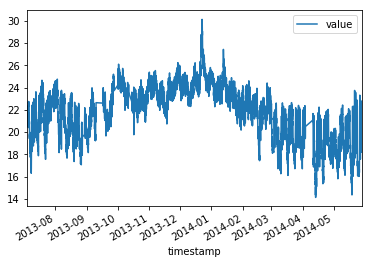

In [7]:
# change the type of timestamp column for plotting
df['timestamp'] = pd.to_datetime(df['timestamp'])
# change fahrenheit to °C (temperature mean= 71 -> fahrenheit)
df['value'] = (df['value'] - 32) * 5/9
# plot the data
df.plot(x='timestamp', y='value')

<a id=section4></a>
### Feature engineering
Extracting some useful features

#### The hours and if it's night or day (7:00-22:00)

In [8]:
df['hours'] = df['timestamp'].dt.hour
df['daylight'] = ((df['hours'] >= 7) & (df['hours'] <= 22)).astype(int)

#### The day of the week (Monday=0, Sunday=6) and if it's a week end day or week day.

In [9]:
df['DayOfTheWeek'] = df['timestamp'].dt.dayofweek
df['WeekDay'] = (df['DayOfTheWeek'] < 5).astype(int)

# An estimation of anomly population of the dataset (necessary for several algorithm)
outliers_fraction = 0.01

#### Time with int to plot easily

In [10]:
df['time_epoch'] = (df['timestamp'].astype(np.int64)/100000000000).astype(np.int64)

#### Creating 4 distinct categories that seem useful (week end/day week & night/day)

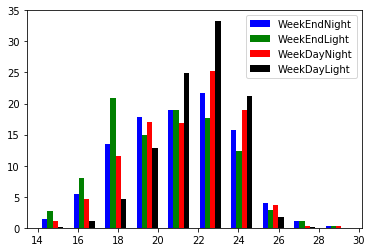

In [11]:
df['categories'] = df['WeekDay']*2 + df['daylight']

a = df.loc[df['categories'] == 0, 'value']
b = df.loc[df['categories'] == 1, 'value']
c = df.loc[df['categories'] == 2, 'value']
d = df.loc[df['categories'] == 3, 'value']

fig, ax = plt.subplots()
a_heights, a_bins = np.histogram(a)
b_heights, b_bins = np.histogram(b, bins=a_bins)
c_heights, c_bins = np.histogram(c, bins=a_bins)
d_heights, d_bins = np.histogram(d, bins=a_bins)

width = (a_bins[1] - a_bins[0])/6

ax.bar(a_bins[:-1], a_heights*100/a.count(), width=width, facecolor='blue', label='WeekEndNight')
ax.bar(b_bins[:-1]+width, (b_heights*100/b.count()), width=width, facecolor='green', label ='WeekEndLight')
ax.bar(c_bins[:-1]+width*2, (c_heights*100/c.count()), width=width, facecolor='red', label ='WeekDayNight')
ax.bar(d_bins[:-1]+width*3, (d_heights*100/d.count()), width=width, facecolor='black', label ='WeekDayLight')

plt.legend()
plt.show()

We can see that the temperature is more stable during daylight of business day.
<a id=section5></a>
# 2 Models
### 2.1 Cluster only
#### Use for collective anomalies (unordered). 

- We group together the usual combination of features. 
- The points that are far from the cluster are points with usual combination of features.
- We consider those points as anomalies.

#### Take useful feature and standardize them

In [12]:
data = df[['value', 'hours', 'daylight', 'DayOfTheWeek', 'WeekDay']]
min_max_scaler = preprocessing.StandardScaler()
np_scaled = min_max_scaler.fit_transform(data)
data = pd.DataFrame(np_scaled)

/home/shubham/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/shubham/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


#### Reduce to 2 importants features

In [13]:
pca = PCA(n_components=2)
data = pca.fit_transform(data)

#### Standardize these 2 new features

In [14]:
min_max_scaler = preprocessing.StandardScaler()
np_scaled = min_max_scaler.fit_transform(data)
data = pd.DataFrame(np_scaled)

#### Calculate with different number of centroids to see the loss plot (elbow method)

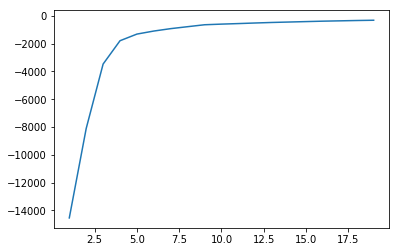

In [15]:
n_cluster = range(1, 20)
kmeans = [KMeans(n_clusters=i).fit(data) for i in n_cluster]
scores = [kmeans[i].score(data) for i in range(len(kmeans))]
fig, ax = plt.subplots()
ax.plot(n_cluster, scores)
plt.show()

#### Not clear, we choose 15 centroids arbitrarily and add these data to the central dataframe.

In [16]:
df['cluster'] = kmeans[14].predict(data)
df['principal_feature1'] = data[0]
df['principal_feature2'] = data[1]
df['cluster'].value_counts()

9     613
5     612
4     597
3     596
0     578
11    565
1     492
10    489
13    484
6     466
8     432
2     351
12    347
14    336
7     309
Name: cluster, dtype: int64

#### Plot the different clusters with the 2 main features

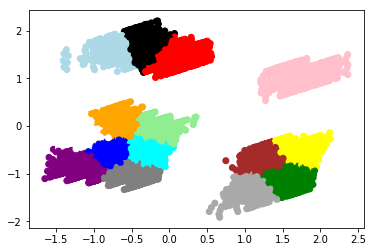

In [17]:
fig, ax = plt.subplots()
colors = {0:'red', 1:'blue', 2:'green', 3:'pink', 4:'black', 5:'orange', 6:'cyan', 7:'yellow', 8:'brown', 9:'purple', 10:'white', 11: 'grey', 12:'lightblue', 13:'lightgreen', 14: 'darkgrey'}
ax.scatter(df['principal_feature1'], df['principal_feature2'], c=df["cluster"].apply(lambda x: colors[x]))
plt.show()

#### Get the distance between each point and its nearest centroid. The biggest distances are considered as anomaly

In [18]:
distance = getDistanceByPoint(data, kmeans[14])
number_of_outliers = int(outliers_fraction*len(distance))
threshold = distance.nlargest(number_of_outliers).min()

# anomaly21 contain the anomaly result of method 2.1 Cluster (0:normal, 1:anomaly) 
df['anomaly21'] = (distance >= threshold).astype(int)

/home/shubham/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':


#### Visualisation of anomaly with cluster view

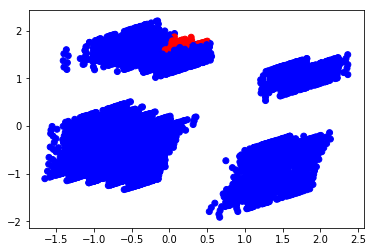

In [19]:
fig, ax = plt.subplots()
colors = {0:'blue', 1:'red'}
ax.scatter(df['principal_feature1'], df['principal_feature2'], c=df["anomaly21"].apply(lambda x: colors[x]))
plt.show()

#### Visualisation of anomaly throughout time (viz 1)

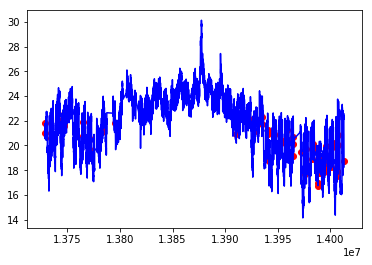

In [20]:
fig, ax = plt.subplots()

a = df.loc[df['anomaly21'] == 1, ['time_epoch', 'value']] #anomaly

ax.plot(df['time_epoch'], df['value'], color='blue')
ax.scatter(a['time_epoch'],a['value'], color='red')
plt.show()

#### Visualisation of anomaly with temperature repartition (viz 2)

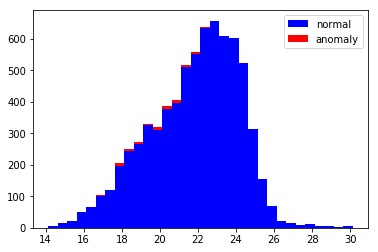

In [21]:
a = df.loc[df['anomaly21'] == 0, 'value']
b = df.loc[df['anomaly21'] == 1, 'value']

fig, axs = plt.subplots()
axs.hist([a,b], bins=32, stacked=True, color=['blue', 'red'], label=['normal', 'anomaly'])
plt.legend()
plt.show()

**Observations**<br>
- Cluster method detects the low temperature around the end of record as unusually low.
- It doesn't detect the highest temperature pic.

<a id=section502></a>
### Categories + Gaussian
#### Use for contextual data and collective anomalies (unordered).  
- We will separate data by important categories.  
- Then we find outliers (gaussian repartition, unimodal) by categories independently.   

#### Creation of 4 differents data set based on categories defined before

In [22]:
df_class0 = df.loc[df['categories'] == 0, 'value']
df_class1 = df.loc[df['categories'] == 1, 'value']
df_class2 = df.loc[df['categories'] == 2, 'value']
df_class3 = df.loc[df['categories'] == 3, 'value']

#### Plot the temperature repartition by categories

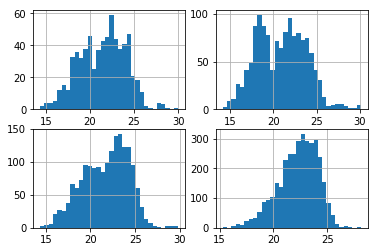

In [23]:
fig, axs = plt.subplots(2,2)
df_class0.hist(ax=axs[0,0],bins=32)
df_class1.hist(ax=axs[0,1],bins=32)
df_class2.hist(ax=axs[1,0],bins=32)
df_class3.hist(ax=axs[1,1],bins=32)

#### Apply ellipticEnvelope(gaussian distribution) at each categories

In [24]:
envelope =  EllipticEnvelope(contamination = outliers_fraction) 
X_train = df_class0.values.reshape(-1,1)
envelope.fit(X_train)
df_class0 = pd.DataFrame(df_class0)
df_class0['deviation'] = envelope.decision_function(X_train)
df_class0['anomaly'] = envelope.predict(X_train)

envelope =  EllipticEnvelope(contamination = outliers_fraction) 
X_train = df_class1.values.reshape(-1,1)
envelope.fit(X_train)
df_class1 = pd.DataFrame(df_class1)
df_class1['deviation'] = envelope.decision_function(X_train)
df_class1['anomaly'] = envelope.predict(X_train)

envelope =  EllipticEnvelope(contamination = outliers_fraction) 
X_train = df_class2.values.reshape(-1,1)
envelope.fit(X_train)
df_class2 = pd.DataFrame(df_class2)
df_class2['deviation'] = envelope.decision_function(X_train)
df_class2['anomaly'] = envelope.predict(X_train)

envelope =  EllipticEnvelope(contamination = outliers_fraction) 
X_train = df_class3.values.reshape(-1,1)
envelope.fit(X_train)
df_class3 = pd.DataFrame(df_class3)
df_class3['deviation'] = envelope.decision_function(X_train)
df_class3['anomaly'] = envelope.predict(X_train)

#### Plot the temperature repartition by categories with anomalies

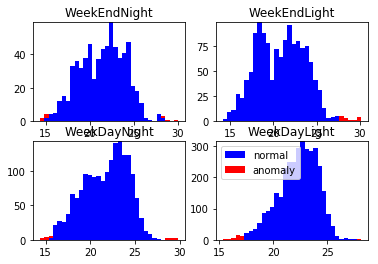

In [25]:

a0 = df_class0.loc[df_class0['anomaly'] == 1, 'value']
b0 = df_class0.loc[df_class0['anomaly'] == -1, 'value']

a1 = df_class1.loc[df_class1['anomaly'] == 1, 'value']
b1 = df_class1.loc[df_class1['anomaly'] == -1, 'value']

a2 = df_class2.loc[df_class2['anomaly'] == 1, 'value']
b2 = df_class2.loc[df_class2['anomaly'] == -1, 'value']

a3 = df_class3.loc[df_class3['anomaly'] == 1, 'value']
b3 = df_class3.loc[df_class3['anomaly'] == -1, 'value']

fig, axs = plt.subplots(2,2)
axs[0,0].hist([a0,b0], bins=32, stacked=True, color=['blue', 'red'], label=['normal', 'anomaly'])
axs[0,1].hist([a1,b1], bins=32, stacked=True, color=['blue', 'red'], label=['normal', 'anomaly'])
axs[1,0].hist([a2,b2], bins=32, stacked=True, color=['blue', 'red'], label=['normal', 'anomaly'])
axs[1,1].hist([a3,b3], bins=32, stacked=True, color=['blue', 'red'], label=['normal', 'anomaly'])
axs[0,0].set_title("WeekEndNight")
axs[0,1].set_title("WeekEndLight")
axs[1,0].set_title("WeekDayNight")
axs[1,1].set_title("WeekDayLight")
plt.legend()
plt.show()

#### Add the data to the main 

In [26]:
df_class = pd.concat([df_class0, df_class1, df_class2, df_class3])
df['anomaly22'] = df_class['anomaly']
df['anomaly22'] = np.array(df['anomaly22'] == -1).astype(int) 

#### Visualisation of anomaly throughout time (viz 1)

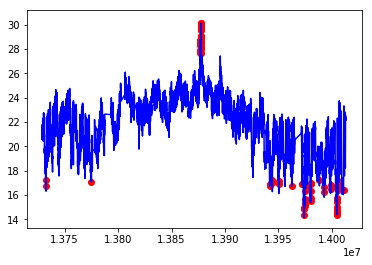

In [27]:
fig, ax = plt.subplots()

a = df.loc[df['anomaly22'] == 1, ('time_epoch', 'value')] #anomaly

ax.plot(df['time_epoch'], df['value'], color='blue')
ax.scatter(a['time_epoch'],a['value'], color='red')
plt.show()

#### Visualisation of anomaly with temperature repartition (viz 2)

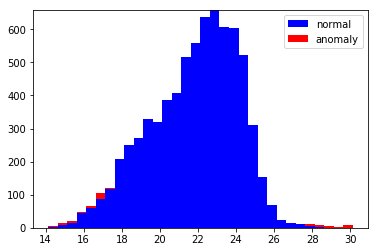

In [28]:
a = df.loc[df['anomaly22'] == 0, 'value']
b = df.loc[df['anomaly22'] == 1, 'value']

fig, axs = plt.subplots()
axs.hist([a,b], bins=32, stacked=True, color=['blue', 'red'], label=['normal', 'anomaly'])
plt.legend()
plt.show()

**Observation:**<br>
Good detections of extreme values and context separation add some precision to the detection.

<a id=section503></a>
### Isolation Forest
#### Use for collective anomalies (unordered).
Simple, works well with different data repartition and efficient with high dimention data.

#### Take useful feature and standardize them 

In [29]:
data = df[['value', 'hours', 'daylight', 'DayOfTheWeek', 'WeekDay']]
min_max_scaler = preprocessing.StandardScaler()
np_scaled = min_max_scaler.fit_transform(data)
data = pd.DataFrame(np_scaled)

/home/shubham/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/shubham/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


#### Train isolation forest 

In [30]:
model =  IsolationForest(contamination = outliers_fraction)
model.fit(data)

/home/shubham/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


IsolationForest(behaviour='old', bootstrap=False, contamination=0.01,
        max_features=1.0, max_samples='auto', n_estimators=100,
        n_jobs=None, random_state=None, verbose=0)

#### Add the data to the main  

In [31]:
df['anomaly25'] = pd.Series(model.predict(data))
df['anomaly25'] = df['anomaly25'].map( {1: 0, -1: 1} )
print(df['anomaly25'].value_counts())

0    7195
1      72
Name: anomaly25, dtype: int64


/home/shubham/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


#### Visualisation of anomaly throughout time (viz 1)

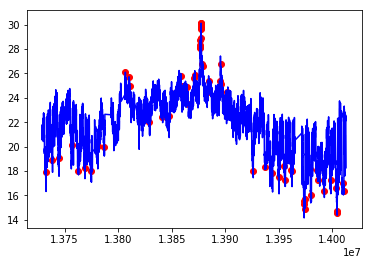

In [32]:
fig, ax = plt.subplots()

a = df.loc[df['anomaly25'] == 1, ['time_epoch', 'value']] #anomaly

ax.plot(df['time_epoch'], df['value'], color='blue')
ax.scatter(a['time_epoch'],a['value'], color='red')
plt.show()

#### Visualisation of anomaly with temperature repartition (viz 2)

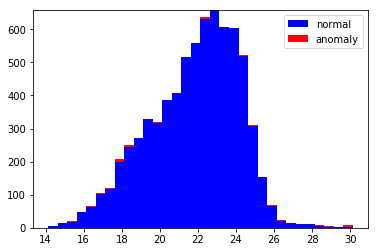

In [33]:
a = df.loc[df['anomaly25'] == 0, 'value']
b = df.loc[df['anomaly25'] == 1, 'value']

fig, axs = plt.subplots()
axs.hist([a,b], bins=32, stacked=True, color=['blue', 'red'], label = ['normal', 'anomaly'])
plt.legend()
plt.show()

<a id=section504></a>
### One class SVM
#### Use for collective anomalies (unordered).
- Good for novelty detection (no anomalies in the train set). 
- This algorithm performs well for multimodal data.

#### Take useful feature and standardize them 

In [34]:
data = df[['value', 'hours', 'daylight', 'DayOfTheWeek', 'WeekDay']]
min_max_scaler = preprocessing.StandardScaler()
np_scaled = min_max_scaler.fit_transform(data)

/home/shubham/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/shubham/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


#### Train one class SVM 

In [35]:
model =  OneClassSVM(nu=0.95 * outliers_fraction) #nu=0.95 * outliers_fraction  + 0.05
data = pd.DataFrame(np_scaled)
model.fit(data)

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma='auto_deprecated',
      kernel='rbf', max_iter=-1, nu=0.0095, random_state=None,
      shrinking=True, tol=0.001, verbose=False)

#### Add the data to the main  

In [36]:
df['anomaly26'] = pd.Series(model.predict(data))
df['anomaly26'] = df['anomaly26'].map( {1: 0, -1: 1} )
print(df['anomaly26'].value_counts())

0    7198
1      69
Name: anomaly26, dtype: int64


#### Visualisation of anomaly throughout time (viz 1)

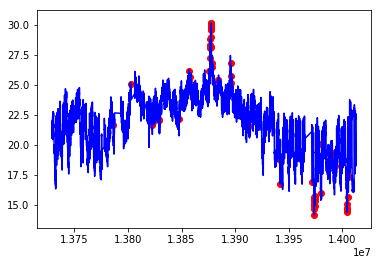

In [37]:
fig, ax = plt.subplots()

a = df.loc[df['anomaly26'] == 1, ['time_epoch', 'value']] #anomaly

ax.plot(df['time_epoch'], df['value'], color='blue')
ax.scatter(a['time_epoch'],a['value'], color='red')
plt.show()

#### Visualisation of anomaly with temperature repartition (viz 2)

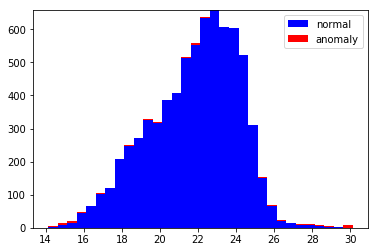

In [38]:
a = df.loc[df['anomaly26'] == 0, 'value']
b = df.loc[df['anomaly26'] == 1, 'value']

fig, axs = plt.subplots()
axs.hist([a,b], bins=32, stacked=True, color=['blue', 'red'], label=['normal', 'anomaly'])
plt.legend()
plt.show()